In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Retail_Dataset2.csv')
print(df.head())

   Product_id  Product_Code Warehouse Product_Category        Date  \
0      786725  Product_0033    Whse_S     Category_005  01/03/2016   
1      786743  Product_1825    Whse_S     Category_006  01/03/2016   
2      786967  Product_0551    Whse_S     Category_030  01/03/2016   
3      786856  Product_0556    Whse_S     Category_030  01/03/2016   
4      899538  Product_1844    Whse_A     Category_018  01/03/2016   

   Order_Demand  Open  Promo StateHoliday  SchoolHoliday  Petrol_price  
0         16000     1      0            0              0            91  
1         50000     1      0            0              0            85  
2          3000     1      0            0              0            85  
3          1000     1      0            0              0            93  
4             7     1      0            0              0            95  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB
None


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
print(df['Date'].dtype)

datetime64[ns]


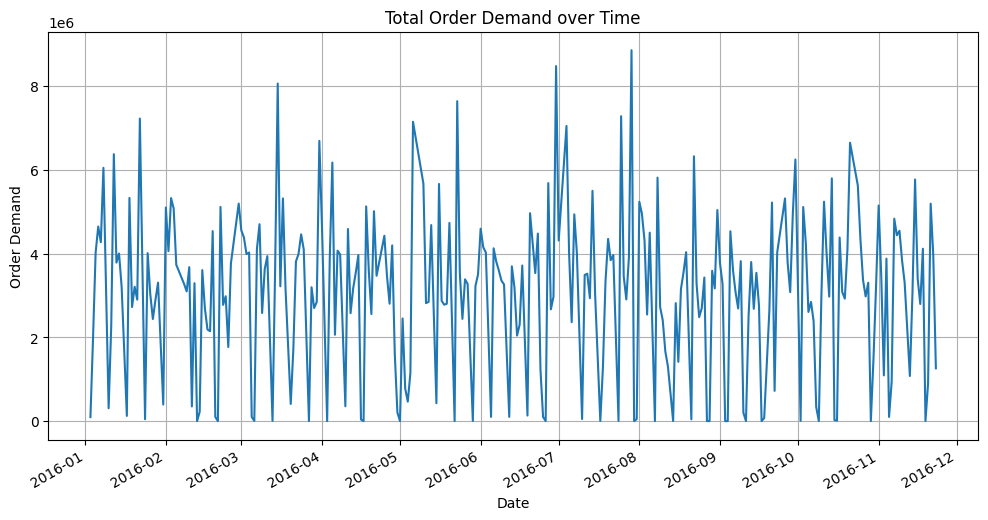

In [6]:
import matplotlib.pyplot as plt

df.groupby('Date')['Order_Demand'].sum().plot(figsize=(12,6))
plt.title('Total Order Demand over Time')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.grid(True)
plt.show()

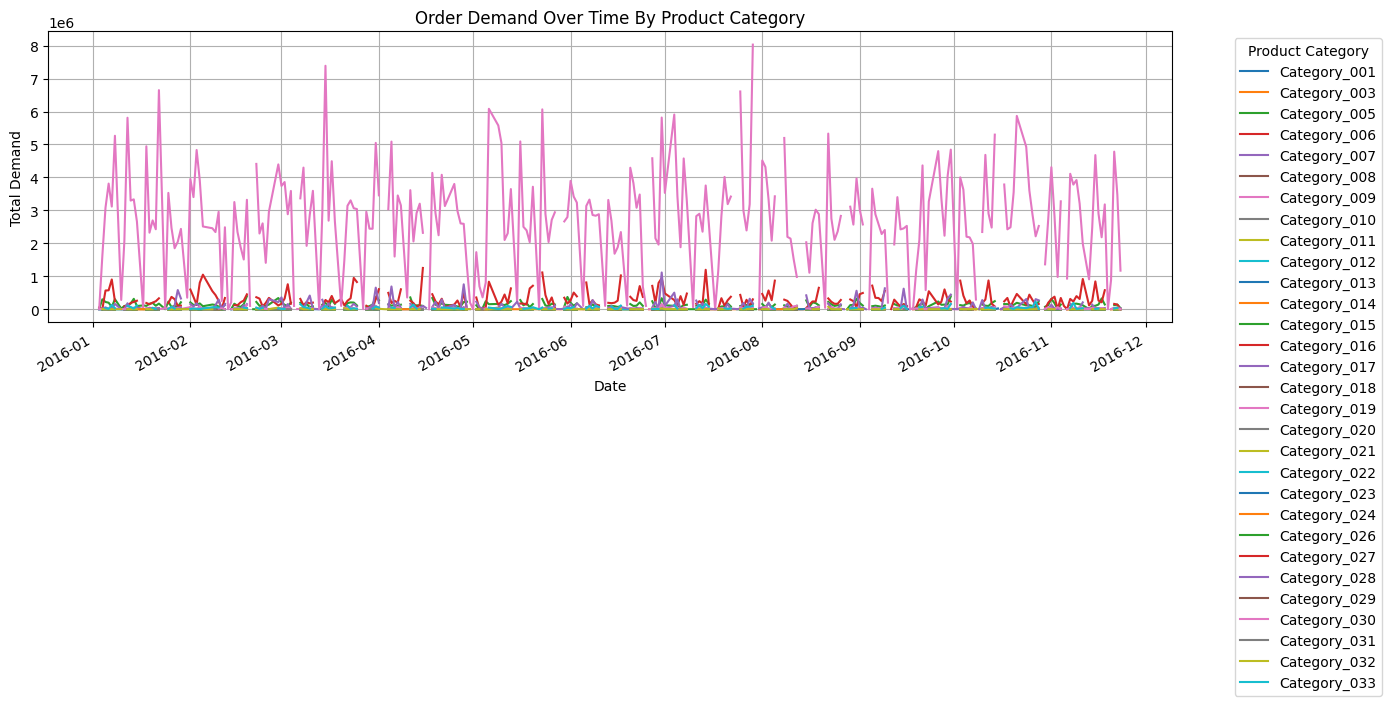

In [7]:
category_demand = df.groupby(['Date', 'Product_Category'])['Order_Demand'].sum().unstack() 

category_demand.plot(figsize=(14,6))
plt.title('Order Demand Over Time By Product Category')
plt.xlabel('Date')
plt.ylabel('Total Demand')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
print(df.isnull().sum())

Product_id          0
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Petrol_price        0
dtype: int64


In [9]:
daily_demand = df.groupby('Date')['Order_Demand'].sum().reset_index()

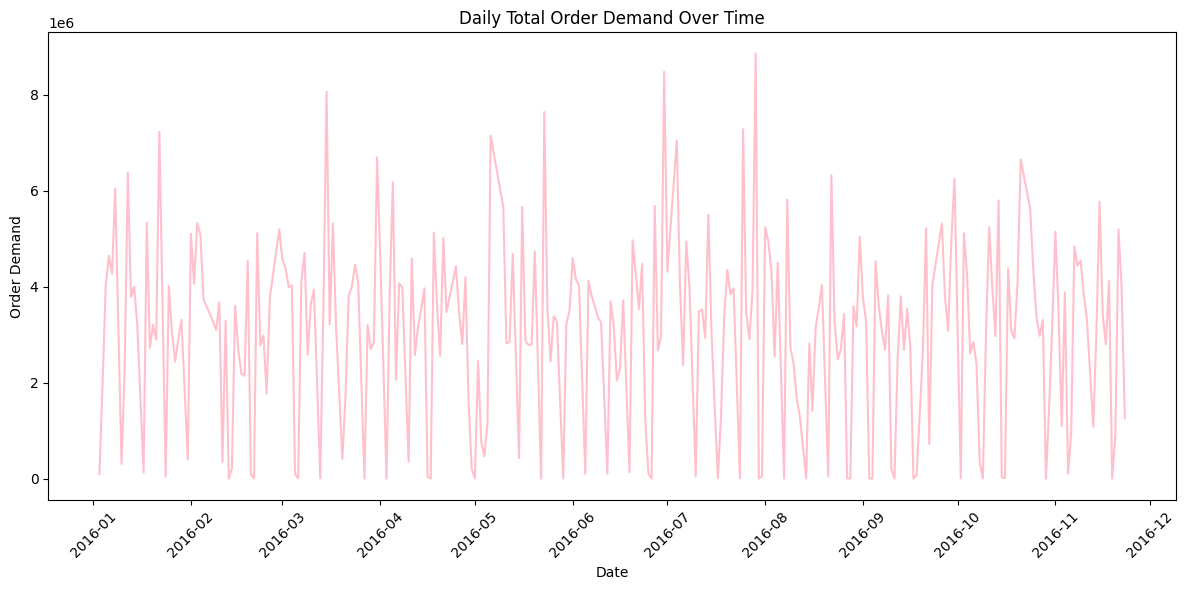

In [10]:
daily_demand = df.groupby('Date')['Order_Demand'].sum().reset_index()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daily_demand['Date'], daily_demand['Order_Demand'], color='pink')
plt.title('Daily Total Order Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
df.set_index('Date', inplace=True)

In [14]:
weekly_demand = df['Order_Demand'].resample('W').sum()

In [16]:
!pip install statsmodels

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

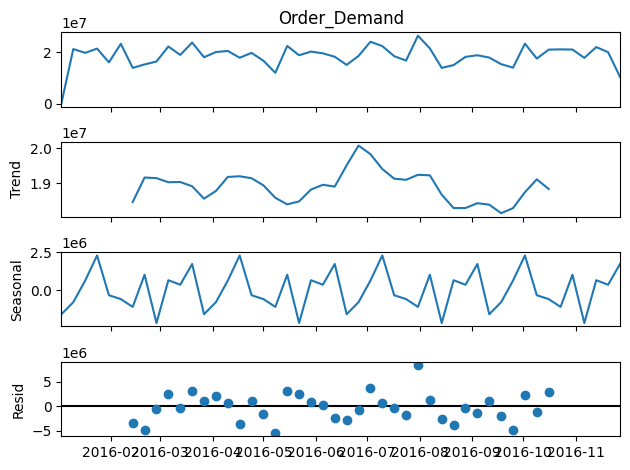

In [23]:
result = seasonal_decompose(weekly_demand, model = 'additive', period=12)
result.plot()
plt.tight_layout()
plt.show()